Converting the link from http://rstudio-pubs-static.s3.amazonaws.com/21542_b90a47cee9024965973368295ad975ac.html to a R Notebook

In [44]:
library(tidyverse)
library(dplyr)

###Sociology 333: Introduction to Quantitative Analysis

Duke University, Summer 2014, Instructor: David Eagle, PhD (Cand.)
The goal of this homework is to get you up and running with R and RStudio. You will be using R throughout the course to learn the statistical concepts discussed in class and in the text. To get things straight: R is a statistical programming language. RStudio is a convenient interface that helps you organize your work.

RStudio consists of a console, which is where R commands are executed; an environment or workspace window, which shows what objects and functions are in the memory and includes a history tab, which shows what commands have been executed; a panel that has things like files, help, etc; and a source window, which shows the content of scripting files that you are working on.

R is an object-oriented language. An object is simply a container to hold information - usually data. Objects have names, which are used to tell R where the variables are located where you want to perform an action.

OK, let's start by accessing some data. This particular dataset, named USArrests, contains the number of arrests for murder, assault, and rape for each of the 50 states in 1973. It also contains the percentage of people in the state who live in an urban area. These data are included with R, and you can get the data object and put it in your workspace/environment as an object. You can then do stuff with this data object, like get help!

The data set is pre-loaded with R, so you can load it directly.

In [45]:
data(USArrests)
#help will give you information about the data set
help(USArrests)

USArrests               package:datasets               R Documentation

_V_i_o_l_e_n_t _C_r_i_m_e _R_a_t_e_s _b_y _U_S _S_t_a_t_e

_D_e_s_c_r_i_p_t_i_o_n:

     This data set contains statistics, in arrests per 100,000
     residents for assault, murder, and rape in each of the 50 US
     states in 1973.  Also given is the percent of the population
     living in urban areas.

_U_s_a_g_e:

     USArrests
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 4 variables.

       [,1]  Murder    numeric  Murder arrests (per 100,000)  
       [,2]  Assault   numeric  Assault arrests (per 100,000) 
       [,3]  UrbanPop  numeric  Percent urban population      
       [,4]  Rape      numeric  Rape arrests (per 100,000)    
      
_N_o_t_e:

     ‘USArrests’ contains the data as in McNeil's monograph.  For the
     ‘UrbanPop’ percentages, a review of the table (No. 21) in the
     Statistical Abstracts 1975 reveals a transcription error for
     Maryland (and that McNeil used the same “round to even” rule that
     R's ‘round()’ uses), as found by Daniel S Coven (Arizona).

     See the example below on how to correct the error and improve
     accuracy for the ‘<n>.5’ percentages.

_S_o_u_r_c_e:

     World Almanac and Book of facts 1975.  (Crime rates).

     Statistical Abstracts of the United States 1975, p.20, (Urban
     rates), possibly available as <URL:
     https://books.google.ch/books?id=zl9qAAAAMAAJ&pg=PA20>.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  New York:
     Wiley.

_S_e_e _A_l_s_o:

     The ‘state’ data sets.

_E_x_a_m_p_l_e_s:

     summary(USArrests)
     
     require(graphics)
     pairs(USArrests, panel = panel.smooth, main = "USArrests data")
     
     ## Difference between 'USArrests' and its correction
     USArrests["Maryland", "UrbanPop"] # 67 -- the transcription error
     UA.C <- USArrests
     UA.C["Maryland", "UrbanPop"] <- 76.6
     
     ## also +/- 0.5 to restore the original  <n>.5  percentages
     s5u <- c("Colorado", "Florida", "Mississippi", "Wyoming")
     s5d <- c("Nebraska", "Pennsylvania")
     UA.C[s5u, "UrbanPop"] <- UA.C[s5u, "UrbanPop"] + 0.5
     UA.C[s5d, "UrbanPop"] <- UA.C[s5d, "UrbanPop"] - 0.5
     
     ## ==> UA.C  is now a *C*orrected version of  USArrests

You can look at the names contained in this data object (or data frame, as R calls them) by typing:

In [46]:
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In general, all commands in R are written something like, command(variable, options). You can get help for every command (or function) by typing help(nameoffunction).

You can look at how big the data frame is by typing:

In [47]:
dim(USArrests)
#help will give you info about Dimentions of an Object
help(dim)

[1] 50  4

dim {base},R Documentation
x,"an R object, for example a matrix, array or data frame."
value,"For the default method, either NULL or a numeric vector, which is coerced to integer (by truncation)."


This tells you that the data frame has 50 rows (i.e. observations) and 4 columns (i.e. variables). You can also click on the little spreadsheet icon in the Environment tab to look at the data in spreadsheet format. Alternatively, you can type:

In [48]:
#view() doesnt work
USArrests

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


Click the “x” to close this view. OK, now a few more things about working with RStudio. You can always enter commands directly in the command window. You get see what commands you've entered by clickling the history tab. It is usually better to record all of your commands in an R Script file. You can then run the whole file, one line of the file, or a selected portion of the file.

To start a new script, click “File->New File->R Script.” A new file pops up. You simply type your commands here. To execute one line at a time type “Command + Enter (Mac) or Ctrl + Enter (Windows, I think!).” You can also run a region of a file, the whole file, etc. These commands are under the “Code” menu.

To include a comment in an R script, type a “#” sign at the beginning of the line. Alternatively, you can hit “Command + Shift + C” to turn the commenting on and off.

In [49]:
# A comment that R will not run. It's here for your benefit. Use LOTS of
# comments! If you need to run your code months from now, or if you are
# doing a HW assignment, comments are gold!

Alright, you now know enough R to get started. We'll keep introducing stuff as we go along. Data frames (a kind of object in R) are organized like a spreadsheet, with variables in columns, and individual observations of those variables in rows. If you've used excel, you'll know that rows in excel are numbered, and columns are lettered. So, A1 is the top-left cell in the spreadsheet. R is a little different. It uses a set of coordinates - first the row number, then the column number. So, in R, the top left entry in the spreadsheet is referenced as [1,1]. In R, you always use square brackets to indicate coordinates. So, for the data frame named USArrests, the top left entry in the spreadsheet can be seen by entering:



In [50]:
USArrests[1, 1]

[1] 13.2

Exercise 1: Start an R Studio session, create a new R Script file, load the USArrests dataset, and enter the command to find the value of the first variable, 3rd observation. How about the 3rd variable, 25th observation? You will send me your R script file, so don't delete it! I should be able to run your file and have it spit out the right answer.



Say you want to look at an entire variable. There are two ways to do this. One is to use coordinates, the other is to reference the variable by name. You tell R to give you all the rows by excluding the row number, or by putting a $ sign after the dataframe name and typing the variable name. So, to see the first variable, in this case, Murder by entering either:

In [51]:
# If you've forgotten the variable names, just type names(USArrests)
USArrests[, 1]

[1] 13.2 10.0  8.1  8.8  9.0  7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2  2.2
[16]  6.0  9.7 15.4  2.1 11.3  4.4 12.1  2.7 16.1  9.0  6.0  4.3 12.2  2.1  7.4
[31] 11.4 11.1 13.0  0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 13.2 12.7  3.2  2.2
[46]  8.5  4.0  5.7  2.6  6.8

In [52]:
USArrests$Murder

[1] 13.2 10.0  8.1  8.8  9.0  7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2  2.2
[16]  6.0  9.7 15.4  2.1 11.3  4.4 12.1  2.7 16.1  9.0  6.0  4.3 12.2  2.1  7.4
[31] 11.4 11.1 13.0  0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 13.2 12.7  3.2  2.2
[46]  8.5  4.0  5.7  2.6  6.8

In [53]:
# Now compare the above commands with:
USArrests[1]

,Murder
,<dbl>
Alabama,13.2
Alaska,10.0
Arizona,8.1
Arkansas,8.8
California,9.0
Colorado,7.9
Connecticut,3.3
Delaware,5.9
Florida,15.4


In [54]:
# And
USArrests[[1]]

[1] 13.2 10.0  8.1  8.8  9.0  7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2  2.2
[16]  6.0  9.7 15.4  2.1 11.3  4.4 12.1  2.7 16.1  9.0  6.0  4.3 12.2  2.1  7.4
[31] 11.4 11.1 13.0  0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 13.2 12.7  3.2  2.2
[46]  8.5  4.0  5.7  2.6  6.8

What's going on??? We are now getting into the weirdities of objects. A data frame object is like a container that holds a bunch of variables. Variables are just vectors of numbers (a vector is just a list of numbers in a big long line). When we give R two coordinates for a data frame, R assumes that we are looking for a vector (or a part of the vector). So it just returns a number. There are now row or columns names associated with it.

When we give R only ONE coordinate (that is [1] NOT [,1] or [1,]), R is assuming we want a slice of the data frame. A slice of the data frame will have attributes (like row and column names) associated with it, whereas an individual variable will not. Just to keep things confusing, if you give R double square brackets, it will assume you are looking for the variable and not a slice of the data frame [[]].

Confused?

You can get the attributes of a data frame, which contain the variable names, the class of the object, and the row names:

In [55]:
attributes(USArrests)

$names
[1] "Murder"   "Assault"  "UrbanPop" "Rape"    

$class
[1] "data.frame"

$row.names
 [1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [56]:
# If you want the row names, type:
attributes(USArrests)$row.names

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

A few more things. R works like a giant calculator. For example:

In [57]:
1 + 1

[1] 2

In [58]:
2 + 3

[1] 5

In [59]:
2 * 4

[1] 8

In [60]:
2 * 4/4

[1] 2

In [61]:
sqrt(2 + 6/(9 * 20) - 300 + 800/2)

[1] 10.10116

In [62]:
sum(1, 2, 3, 4)

[1] 10

Finally, R excels at making graphs. A picture is worth a thousand words. For instance, of I say, “chalkboard beverage dispenser,” what do you think of? Click here…Now it's clear, isn't it?

Lets look at the murder rate for each of the 50 states using a simple bar graph. We need to tell R where to get the names for each bar from (the command row.names(USArrests) gets these names). The las=2 option just tells R to print the variable names at a 90 degree angle, ylab= tells what label to give to the y axis, and main= tells R what title to give the plot. Notice that in the command window, I've hit enter after the commas to make it all fit on the screen more nicely. R knows that the command continues on the next line.

The plot will show up in the little plot window. Click zoom and resize the window to see it bigger.

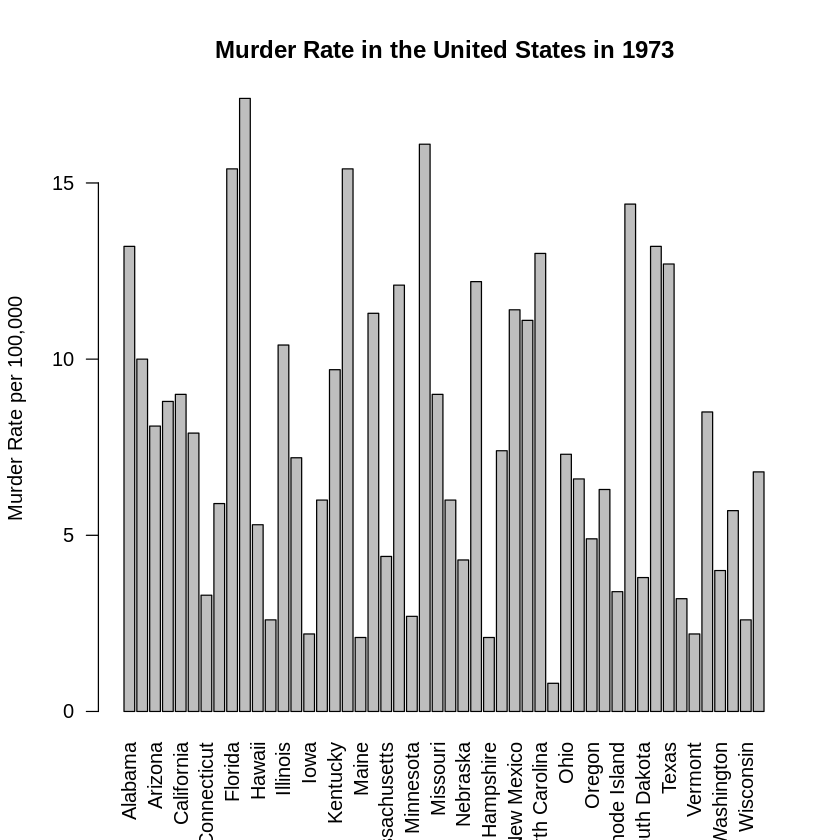

In [63]:
state.names = row.names(USArrests)
barplot(USArrests$Murder, names.arg = state.names, las = 2, ylab = "Murder Rate per 100,000", 
    main = "Murder Rate in the United States in 1973")

We might wonder if there are lots of states with high rates of rape. A frequency plot (or histogram) will tell us this. Histograms are among the most useful plots for exploring data.

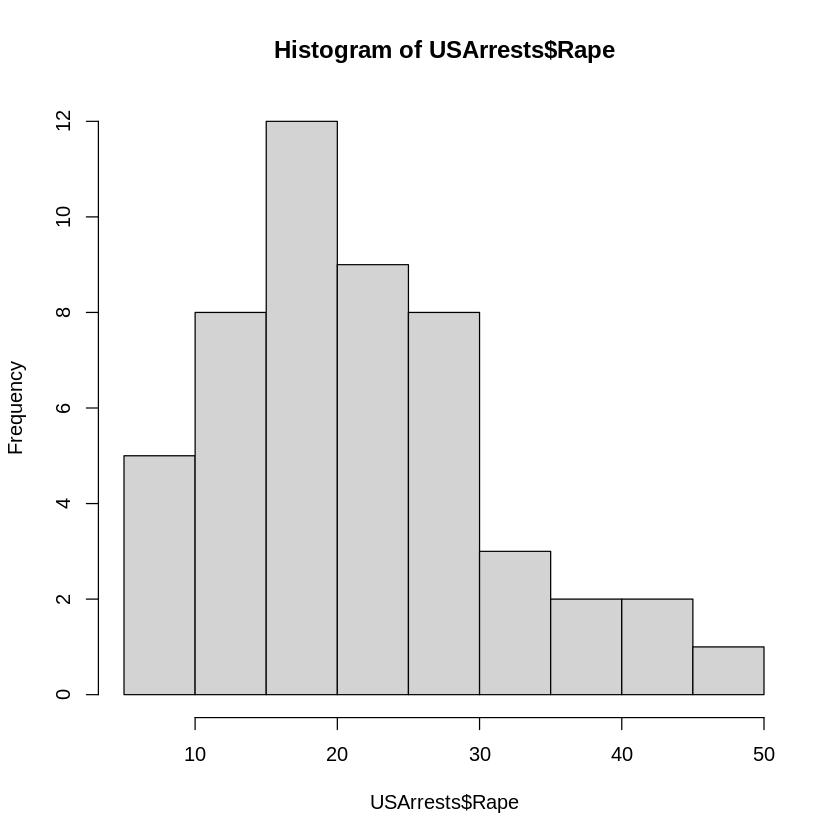

In [64]:
hist(USArrests$Rape)

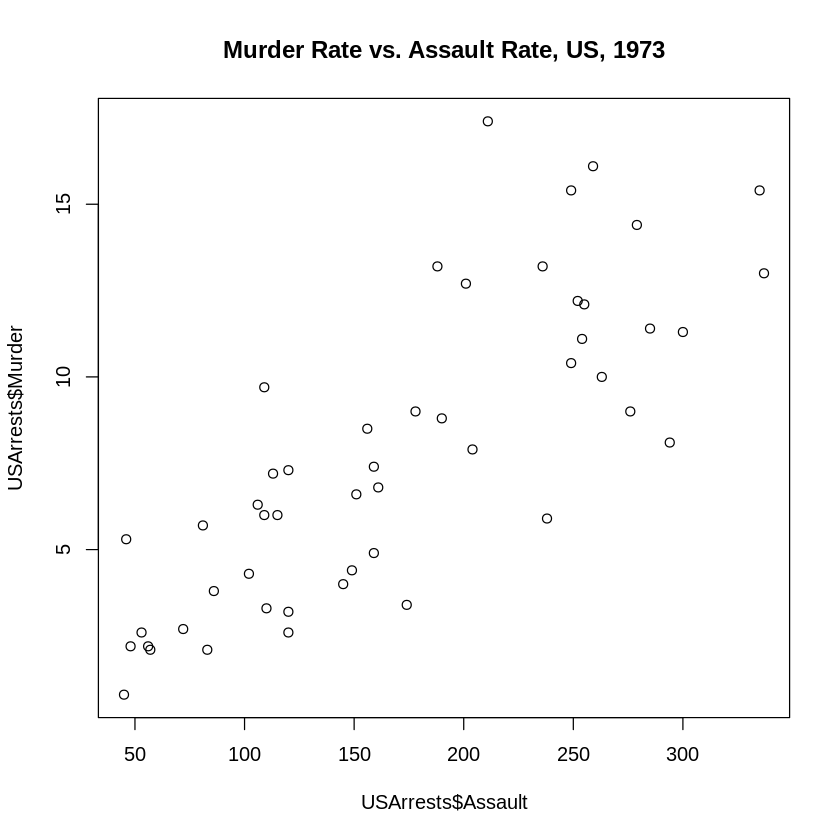

In [65]:
plot(y = USArrests$Murder, x = USArrests$Assault, main = "Murder Rate vs. Assault Rate, US, 1973")

Yup, it's true. We know it's true because if we drew a line through the points, it would point uphill (i.e. it would have a positive slope). This means that there is a positive relationship between y and x. When y gets bigger, x gets bigger.

OK, now it's your turn to do some work with R. Complete the following exercises in your R script. Add comments to tell me what you did! We are going to use a new dataset available online. Run the following command to get it. The data frame is named present. It should show up in your Environment tab when you execute the following command:

In [66]:
source("http://www.openintro.org/stat/data/present.R")

This data frame contains the number of boys and girls born in the US in each year from 1940 until 2002, taken from the Centers for Disease Control.

The rest of this notebook will be code that I, Tyler Fansler, have written. The above ^^ code has been pulled from the link at the top of the notebook. In this section I will tinker with debugging in R Studio

In [74]:
array = c(1,2,3,4,5,6,7,8,9,10)
for (i in 1:11) {
    print(array[i])
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] NA
